In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import ast, seaborn as sns
from adjustText import adjust_text
from datetime import datetime as dt
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset


#setup
dataset = load_dataset('lukebarousse/data_jobs')
csv = dataset['train'].to_pandas()
csv["job_posted_date"] = pd.to_datetime(csv["job_posted_date"])
csv['job_skills'] = csv['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
csv_us = csv[csv['job_country'] == 'United States'].copy()

In [4]:
job_titles = csv_us['job_title_short'].value_counts().index[:6].tolist()

In [5]:
csv_top_jobs = csv_us[csv_us['job_title_short'].isin(job_titles)]

In [6]:
job_order = csv_top_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()

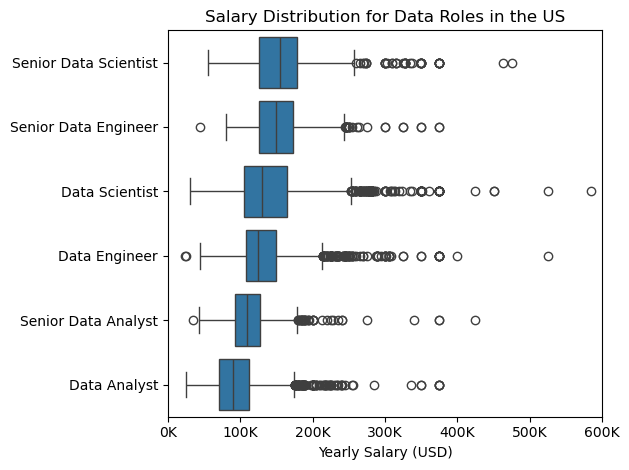

In [ ]:
ax = sns.boxplot(
    data=csv_top_jobs,
    x='salary_year_avg',
    y='job_title_short',
    # order=job_titles[::-1], 
    order=job_order,
)
plt.xlim(0, 600000) # there's only one job with a salary above 600k so we just ignore it
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.title('Salary Distribution for Data Roles in the US')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()

In [8]:
csv_DA = csv[(csv['job_title_short'] == 'Data Analyst') & (csv['job_country'] == 'United States')].copy()

In [9]:
csv_explode = csv_DA.explode('job_skills')

In [15]:
csv_top_paid_skills = csv_explode.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).head(10).reset_index()

In [11]:
top_10_demand_skills = csv_explode.groupby('job_skills').size().sort_values(ascending=False).head(10).index.tolist()

In [16]:
csv_top_demanded_skills = csv_explode[csv_explode['job_skills'].isin(top_10_demand_skills)].groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).reset_index()

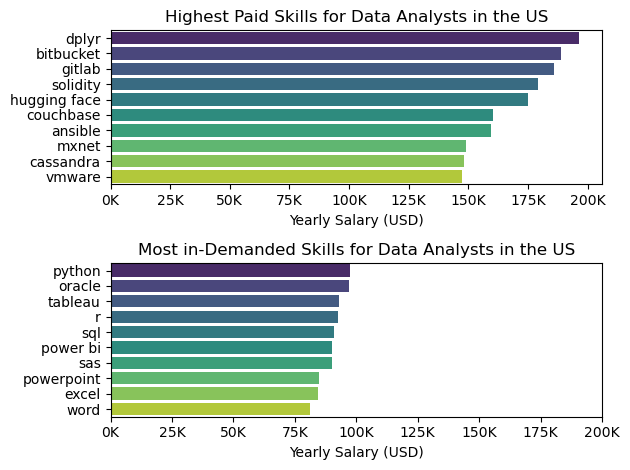

In [ ]:
fig, ax = plt.subplots(2, 1)
sns.barplot(
    data=csv_top_paid_skills,
    x='salary_year_avg',
    y='job_skills',
    ax=ax[0],
    hue='job_skills',
    palette='viridis'
)
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_xlabel('Yearly Salary (USD)')
ax[0].set_ylabel('')

sns.barplot(
    data=csv_top_demanded_skills,
    x='salary_year_avg',
    y='job_skills',
    ax=ax[1],
    hue='job_skills',
    palette='viridis'
)
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_title('Most in-Demanded Skills for Data Analysts in the US')
ax[1].set_xlabel('Yearly Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(0, 200_000)

fig.tight_layout()
plt.show()